In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests

import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

**Dataframes with data:**
series_df - contains series data
* id
* location
* continent
* link

races_df - contains race data
* id
* seriesID (links to series_df)
* year
* link
* konaSlots
* male1st
* female1st
* dnf
* dq

results_df - (contians individual race data)
* bib
* name
* athleteLink
* country
* gender
* division
* divLink
* divisionRank
* overallTime
* overallRank
* swimTime
* swimRank
* bikeTime
* bikeRank
* runTime
* runRank
* finishStatus
* raceID
* athleteID



In [2]:
#let's just load the csvs used to create the SQLite database
races_df = pd.read_csv("./IronManData/sql/races.csv")
series_df = pd.read_csv("./IronManData/sql/series.csv")
results_df = pd.read_csv("./IronManData/sql/results.csv")

### Question: How many Ironman races have happened over the years?

In [3]:
# Aggregate and count the number of races by 'year'
races_count_by_year = races_df.groupby('year').size().reset_index(name='count')

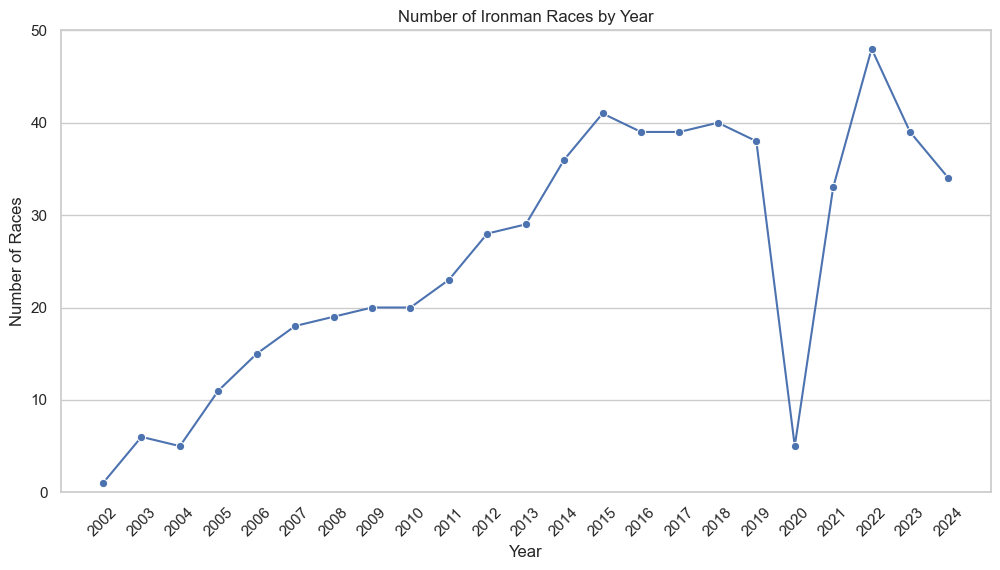

In [4]:
# Create a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', data=races_count_by_year, marker='o')

# Customize the plot
plt.title('Number of Ironman Races by Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.xticks(races_count_by_year['year'],rotation=45)  # Ensure all years are shown on the x-axis
plt.grid(axis='x')
plt.ylim(0,50)

# Show the plot
plt.show()


In [5]:
races_count_by_year

,year,count
0,2002,1
1,2003,6
2,2004,5
3,2005,11
4,2006,15
5,2007,18
6,2008,19
7,2009,20
8,2010,20
9,2011,23


Looks like Ironman reached its "threshold" aorund 2015 and hovered around 40*ish* non-Professional races a year. The obvious exceptions to thsi data is 2020 and 2021 where the pandemic cancelled many events. It looks like a lot of events ended up being deferred into 2022 as seen by the spike. Note that 2024 data is not complete.

In [6]:
# Merge DataFrames on 'seriesID' and 'series_id'
merged_df = pd.merge(races_df, series_df, left_on='seriesID', right_on='id')
# Rename columns
merged_df = merged_df.rename(columns={'id_x': 'raceID','link_y': 'seriesLink','link_x': 'raceLink'})
merged_df = merged_df.drop('id_y',axis=1)
merged_df


,year,raceLink,totalkonaSlots,maleKonaSlots,femaleKonaSlots,male1st,female1st,finishers,dnf,dq,raceID,seriesID,location,continent,seriesLink
0,2022,https://www.coachcox.co.uk/imstats/race/1883/r...,45,NaN,NaN,33077,37383,718,125,0,1883,332,Ironman Alaska,North America,https://www.coachcox.co.uk/imstats/series/332/
1,2024,https://www.coachcox.co.uk/imstats/race/2166/r...,100,65.0,35.0,29466,35348,1440,191,2,2166,1,Ironman Arizona,North America,https://www.coachcox.co.uk/imstats/series/1/
2,2023,https://www.coachcox.co.uk/imstats/race/2134/r...,80,20.0,60.0,29821,32654,1593,167,0,2134,1,Ironman Arizona,North America,https://www.coachcox.co.uk/imstats/series/1/
3,2022,https://www.coachcox.co.uk/imstats/race/1903/r...,55,NaN,NaN,27960,31358,1993,406,2,1903,1,Ironman Arizona,North America,https://www.coachcox.co.uk/imstats/series/1/
4,2021,https://www.coachcox.co.uk/imstats/race/1768/r...,45,NaN,NaN,30210,35854,1932,358,9,1768,1,Ironman Arizona,North America,https://www.coachcox.co.uk/imstats/series/1/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2011,https://www.coachcox.co.uk/imstats/race/49/res...,0,NaN,NaN,29136,30836,1505,228,0,49,21,Ironman South Africa,Africa,https://www.coachcox.co.uk/imstats/series/21/
583,2010,https://www.coachcox.co.uk/imstats/race/48/res...,0,NaN,NaN,30208,33415,1548,106,0,48,21,Ironman South Africa,Africa,https://www.coachcox.co.uk/imstats/series/21/
584,2009,https://www.coachcox.co.uk/imstats/race/47/res...,0,NaN,NaN,29852,33392,1306,214,0,47,21,Ironman South Africa,Africa,https://www.coachcox.co.uk/imstats/series/21/
585,2008,https://www.coachcox.co.uk/imstats/race/46/res...,0,NaN,NaN,29903,34068,1403,164,0,46,21,Ironman South Africa,Africa,https://www.coachcox.co.uk/imstats/series/21/


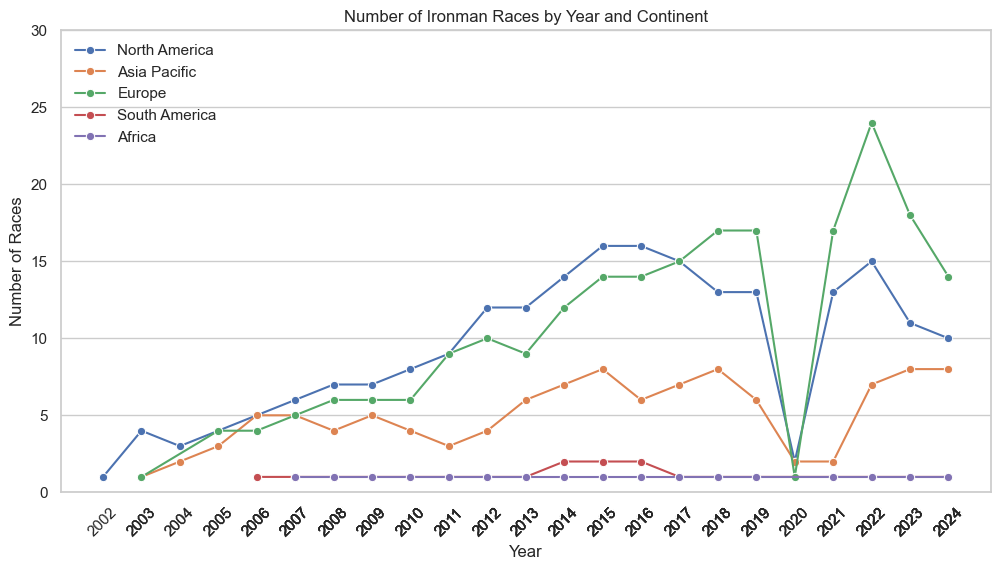

In [7]:
# Aggregate and count the number of races by 'year' and 'continent'
races_count_by_year_continent = merged_df.groupby(['year', 'continent']).size().reset_index(name='count')

# Create a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count',hue='continent', data=races_count_by_year_continent, marker='o')

# Customize the plot
plt.title('Number of Ironman Races by Year and Continent')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.xticks(races_count_by_year_continent['year'],rotation=45)  # Ensure all years are shown on the x-axis
plt.grid(axis='x')
plt.ylim(0,30)

# Remove legend border 
plt.legend(frameon=False)

# Show the plot
plt.show()



In [46]:
races_count_by_year_continent[(races_count_by_year_continent['year'].isin([2023,2022,2024])) & (races_count_by_year_continent['continent'].isin(['Europe','North America']))].sort_values(by=['continent','year'])

,year,continent,count
87,2022,Europe,24
92,2023,Europe,18
97,2024,Europe,14
88,2022,North America,15
93,2023,North America,11
98,2024,North America,10


In [8]:
# Group by 'year' and sum 'Finishers', 'dnf', and 'dq'
finisher_data_by_year = merged_df.groupby('year')[['finishers', 'dnf', 'dq']].sum().reset_index()
finisher_data_by_year['sum'] = finisher_data_by_year['finishers'] + finisher_data_by_year['dnf'] + finisher_data_by_year['dq']


In [9]:
finisher_data_by_year

,year,finishers,dnf,dq,sum
0,2002,1638,424,0,2062
1,2003,8664,2410,0,11074
2,2004,7853,1466,0,9319
3,2005,15936,3481,0,19417
4,2006,21253,4456,0,25709
5,2007,26603,5757,0,32360
6,2008,31358,6968,0,38326
7,2009,32738,6827,0,39565
8,2010,33835,3436,6,37277
9,2011,40027,4081,1,44109


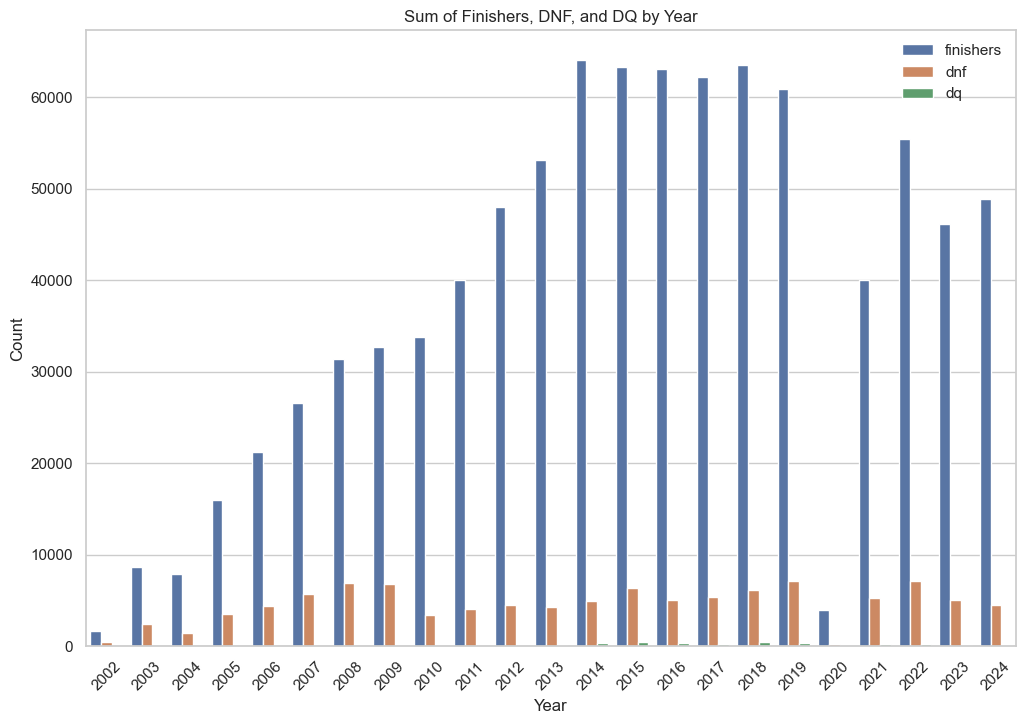

In [10]:
# Create a bar plot
plt.figure(figsize=(12, 8))

# Melt the DataFrame for easier plotting with Seaborn
finisher_data_by_year_melted = finisher_data_by_year.melt(id_vars=['year'], value_vars=['finishers', 'dnf', 'dq'], 
                                        var_name='Status', value_name='Count')

sns.barplot(x='year', y='Count', hue='Status', data=finisher_data_by_year_melted)

# Customize the plot
plt.title('Sum of Finishers, DNF, and DQ by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(frameon=False)  # Remove legend border
plt.xticks(rotation=45)  # Rotate year labels if necessary

# Show the plot
plt.show()


Although there have been less races this year, there have been more participants in relation to 2023.

In [11]:
ratio_data_by_year = pd.merge(races_count_by_year,finisher_data_by_year,left_on='year', right_on='year')
#participants per race
ratio_data_by_year['ratio'] = ratio_data_by_year['sum']/ratio_data_by_year['count']
ratio_data_by_year.head()

,year,count,finishers,dnf,dq,sum,ratio
0,2002,1,1638,424,0,2062,2062.000000
1,2003,6,8664,2410,0,11074,1845.666667
2,2004,5,7853,1466,0,9319,1863.800000
3,2005,11,15936,3481,0,19417,1765.181818
4,2006,15,21253,4456,0,25709,1713.933333


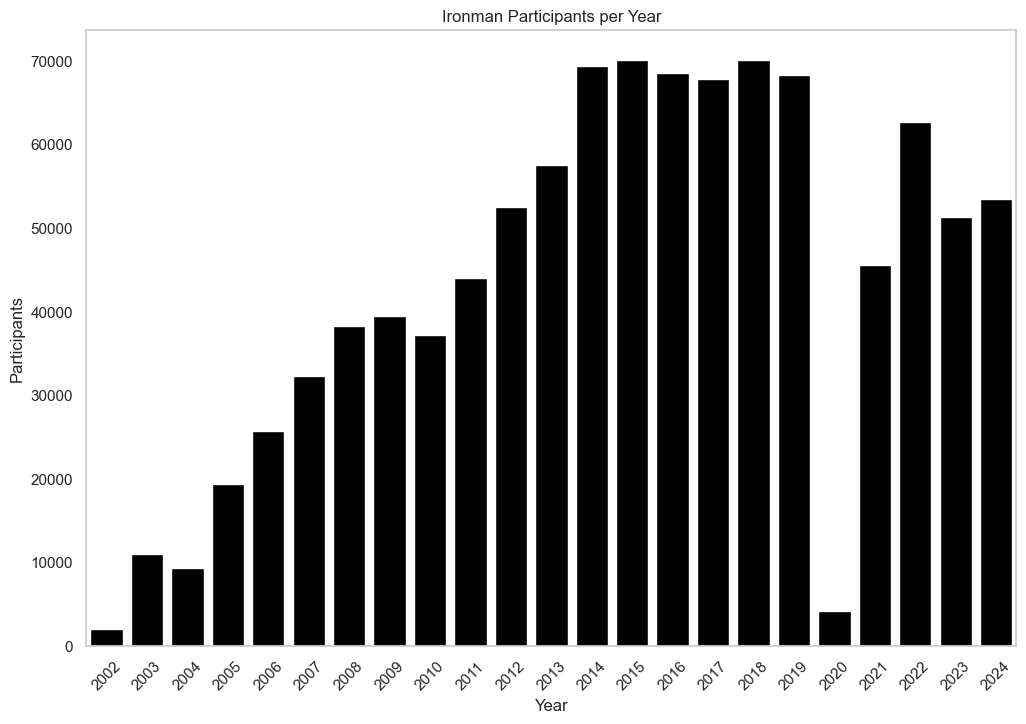

In [12]:
# Create a bar plot
plt.figure(figsize=(12, 8))

# Create a bar plot instead of a line plot
sns.barplot(x='year', y='sum', data=ratio_data_by_year, color='black')

# Customize the plot
plt.title('Ironman Participants per Year')
plt.xlabel('Year')
plt.ylabel('Participants')
plt.xticks(rotation=45)  # Rotate year labels if necessary
plt.grid(False)

# Show the plot
plt.show()


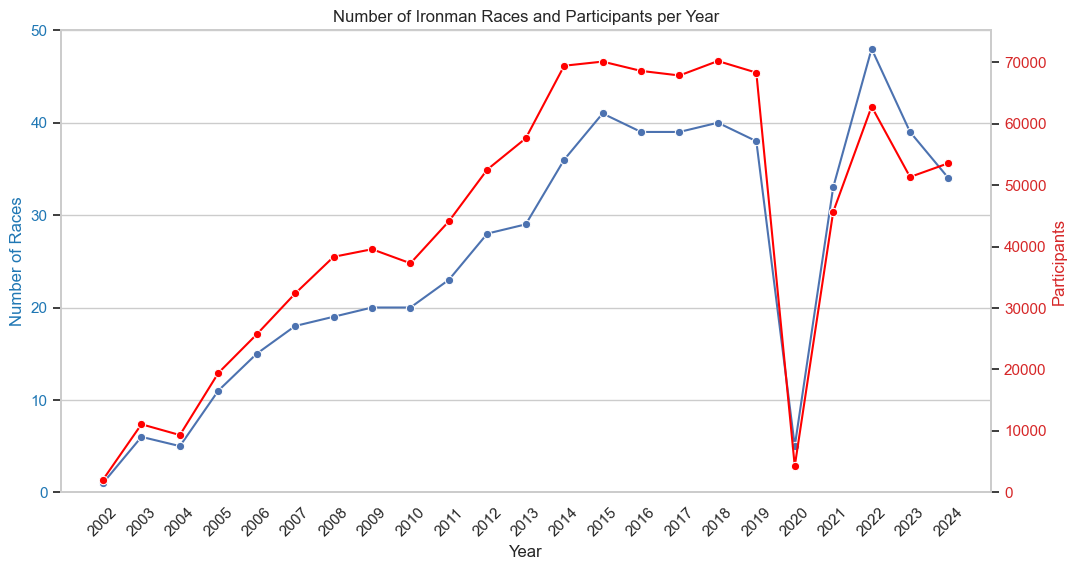

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming races_count_by_year and ratio_data_by_year are your DataFrames

# Set the style
sns.set(style="whitegrid")

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first dataset (Number of Ironman Races by Year) on the first axis
sns.lineplot(x='year', y='count', data=races_count_by_year, marker='o', ax=ax1,linewidth=1.5)
ax1.set_title('Number of Ironman Races and Participants per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Races', color='tab:blue')  # Set y-axis label color
ax1.tick_params(axis='y', labelcolor='tab:blue')  # Set y-axis tick label color
ax1.set_ylim(0, 50)  # Adjust the limit as needed
plt.xticks(races_count_by_year['year'],rotation=45)  # Rotate year labels if necessary

# Create a second y-axis for the second dataset
ax2 = ax1.twinx()
sns.lineplot(x='year', y='sum', data=ratio_data_by_year, marker='o', linewidth=1.5, color='red', ax=ax2)
ax2.set_ylabel('Participants', color='tab:red')  # Set y-axis label color
ax2.tick_params(axis='y', labelcolor='tab:red')  # Set y-axis tick label color
ax2.set_ylim(0, ratio_data_by_year['sum'].max() + 5000)  # Adjust the limit as needed

# Customize the second y-axis
ax2.grid(False)
ax1.grid(axis='x')

# Show the plot
plt.show()


In [14]:
results_merged_df = pd.merge(results_df,merged_df,left_on='raceID',right_on='raceID')

In [15]:
results_merged_df.columns

Index(['bib', 'Name', 'athleteLink', 'Country', 'Gender', 'Division',
       'divLink', 'divisionRank', 'overallTime', 'overallRank', 'swimTime',
       'swimRank', 'bikeTime', 'bikeRank', 'runTime', 'runRank',
       'finishStatus', 'raceID', 'athleteID', 'year', 'raceLink',
       'totalkonaSlots', 'maleKonaSlots', 'femaleKonaSlots', 'male1st',
       'female1st', 'finishers', 'dnf', 'dq', 'seriesID', 'location',
       'continent', 'seriesLink'],
      dtype='object')

In [16]:
len(results_merged_df['Country'].unique())

682

## Breakdown by age categories (non-Pro)

In [17]:
#let's just create a new df

#filter out all pro results
# Filter out 'FPRO' and 'MPRO' and ensure 'divLink' is not NaN
df = results_merged_df[~results_merged_df['Division'].isin(['FPRO', 'MPRO']) & results_merged_df['divLink'].notna()]

# Display the filtered DataFrame
print(df.head())

     bib             Name                                        athleteLink  \
19  1298   Tyson Williams  https://www.coachcox.co.uk/imstats/athlete/156...   
22  1592     Tony Delogne  https://www.coachcox.co.uk/imstats/athlete/154...   
23  2971  Patrick Wheeler  https://www.coachcox.co.uk/imstats/athlete/59304/   
26  1548      Kevin Coady  https://www.coachcox.co.uk/imstats/athlete/136...   
29  1621    Steve Johnson  https://www.coachcox.co.uk/imstats/athlete/31874/   

          Country Gender Division  \
19  United States   Male   M25-29   
22  United States   Male   M35-39   
23  United States   Male   M25-29   
26  United States   Male   M35-39   
29  United States   Male   M35-39   

                                              divLink  divisionRank  \
19  https://www.coachcox.co.uk/imstats/im/division...           1.0   
22  https://www.coachcox.co.uk/imstats/im/division...           1.0   
23  https://www.coachcox.co.uk/imstats/im/division...           1.0   
26  https://

In [18]:
#let's take a look at participants over the year
division_year_df = df.groupby(['year', 'Division']).size().reset_index(name='count')

In [19]:
#Let's take a look at a some of the entries that we care abou
division_year_df['Division'].unique()

array(['F18-24', 'F25-29', 'F30-34', 'F35-39', 'F40-44', 'F45-49',
       'F50-54', 'F55-59', 'F60-64', 'F65-69', 'M18-24', 'M25-29',
       'M30-34', 'M35-39', 'M40-44', 'M45-49', 'M50-54', 'M55-59',
       'M60-64', 'M65-69', 'M70-74', 'M75-79', 'F70-74', 'M80+', 'M70-99',
       'F70-99', 'F44', 'F80-84', 'M80-84', 'F14-', 'F65 y + Z2',
       'F75-79', 'M40-44 Cat', 'M70 y +', 'M70+', 'F70&+', 'M80&+',
       'F80+', 'F85+', 'M85+', 'M85-89'], dtype=object)

In [20]:
print(df[df['Division'] == 'F65 y + Z2'])

         bib            Name athleteLink        Country  Gender    Division  \
702307  1748  Karen Aydelott         NaN  UNITED STATES  Female  F65 y + Z2   

                                                  divLink  divisionRank  \
702307  https://www.coachcox.co.uk/imstats/im/division...           NaN   

       overallTime  overallRank  ... femaleKonaSlots  male1st female1st  \
702307         NaN          NaN  ...             NaN    30232     33248   

        finishers  dnf  dq seriesID         location      continent  \
702307       1745  116   0        8  Ironman Cozumel  North America   

                                          seriesLink  
702307  https://www.coachcox.co.uk/imstats/series/8/  

[1 rows x 33 columns]


In [21]:
#There seems to be some weird categories. Let's get a better take this and run ith

# URL of the website
url = 'https://www.coachcox.co.uk/imstats/im/division/'

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find all elements with class "ims-idx-row-title"
elements = soup.find_all(class_='ims-idx-row-title')

# Extract and print the text of each element
division_list = [element.get_text(strip=True) for element in elements]

print(division_list)


['M18-24', 'M25-29', 'M30-34', 'M35-39', 'M40-44', 'M45-49', 'M50-54', 'M55-59', 'M60-64', 'M65-69', 'M70-74', 'M75-79', 'M80-84', 'M85-89', 'M90+', 'F18-24', 'F25-29', 'F30-34', 'F35-39', 'F40-44', 'F45-49', 'F50-54', 'F55-59', 'F60-64', 'F65-69', 'F70-74', 'F75-79', 'F80-84', 'F85-89', 'F90+']


In [22]:
df = df[df['Division'].isin(division_list)]

In [23]:
#let's see how many records have been removed since
len(results_df)-len(df)

27429

In [24]:
df

,bib,Name,athleteLink,Country,Gender,Division,divLink,divisionRank,overallTime,overallRank,...,femaleKonaSlots,male1st,female1st,finishers,dnf,dq,seriesID,location,continent,seriesLink
19,1298,Tyson Williams,https://www.coachcox.co.uk/imstats/athlete/156...,United States,Male,M25-29,https://www.coachcox.co.uk/imstats/im/division...,1.0,NaN,19.0,...,NaN,28993,32501,2366,146,1,1,Ironman Arizona,North America,https://www.coachcox.co.uk/imstats/series/1/
22,1592,Tony Delogne,https://www.coachcox.co.uk/imstats/athlete/154...,United States,Male,M35-39,https://www.coachcox.co.uk/imstats/im/division...,1.0,8:50:21,22.0,...,NaN,28993,32501,2366,146,1,1,Ironman Arizona,North America,https://www.coachcox.co.uk/imstats/series/1/
23,2971,Patrick Wheeler,https://www.coachcox.co.uk/imstats/athlete/59304/,United States,Male,M25-29,https://www.coachcox.co.uk/imstats/im/division...,1.0,8:55:34,23.0,...,NaN,28993,32501,2366,146,1,1,Ironman Arizona,North America,https://www.coachcox.co.uk/imstats/series/1/
26,1548,Kevin Coady,https://www.coachcox.co.uk/imstats/athlete/136...,United States,Male,M35-39,https://www.coachcox.co.uk/imstats/im/division...,2.0,8:56:31,26.0,...,NaN,28993,32501,2366,146,1,1,Ironman Arizona,North America,https://www.coachcox.co.uk/imstats/series/1/
29,1621,Steve Johnson,https://www.coachcox.co.uk/imstats/athlete/31874/,United States,Male,M35-39,https://www.coachcox.co.uk/imstats/im/division...,3.0,9:03:56,29.0,...,NaN,28993,32501,2366,146,1,1,Ironman Arizona,North America,https://www.coachcox.co.uk/imstats/series/1/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096714,953,Maurus Oettl,https://www.coachcox.co.uk/imstats/athlete/238...,Germany,Male,M50-54,https://www.coachcox.co.uk/imstats/im/division...,NaN,NaN,NaN,...,NaN,29677,32824,1794,363,0,3,Ironman Austria,Europe,https://www.coachcox.co.uk/imstats/series/3/
1096715,184,Andreas Frischmann,https://www.coachcox.co.uk/imstats/athlete/237...,Germany,Male,M18-24,https://www.coachcox.co.uk/imstats/im/division...,NaN,NaN,NaN,...,NaN,29677,32824,1794,363,0,3,Ironman Austria,Europe,https://www.coachcox.co.uk/imstats/series/3/
1096716,1981,Marco Meazza,https://www.coachcox.co.uk/imstats/athlete/238...,Italy,Male,M50-54,https://www.coachcox.co.uk/imstats/im/division...,NaN,NaN,NaN,...,NaN,29677,32824,1794,363,0,3,Ironman Austria,Europe,https://www.coachcox.co.uk/imstats/series/3/
1096717,446,Roman Schaller,https://www.coachcox.co.uk/imstats/athlete/238...,Austria,Male,M18-24,https://www.coachcox.co.uk/imstats/im/division...,NaN,NaN,NaN,...,NaN,29677,32824,1794,363,0,3,Ironman Austria,Europe,https://www.coachcox.co.uk/imstats/series/3/


In [25]:
df.columns

Index(['bib', 'Name', 'athleteLink', 'Country', 'Gender', 'Division',
       'divLink', 'divisionRank', 'overallTime', 'overallRank', 'swimTime',
       'swimRank', 'bikeTime', 'bikeRank', 'runTime', 'runRank',
       'finishStatus', 'raceID', 'athleteID', 'year', 'raceLink',
       'totalkonaSlots', 'maleKonaSlots', 'femaleKonaSlots', 'male1st',
       'female1st', 'finishers', 'dnf', 'dq', 'seriesID', 'location',
       'continent', 'seriesLink'],
      dtype='object')

In [26]:
participants_continent_df = df.groupby(['year', 'raceID','continent']).size().reset_index(name='count')

In [27]:
# Group by continent to get the number of unique race IDs and sum of count
result_df = participants_continent_df.groupby(['year','continent']).agg(
    unique_raceIDs=('raceID', 'nunique'),
    total_count=('count', 'sum')
).reset_index()

result_df['ratio'] = result_df['total_count']/result_df['unique_raceIDs']

In [28]:
result_df.head()

,year,continent,unique_raceIDs,total_count,ratio
0,2002,North America,1,2028,2028.0
1,2003,Asia Pacific,1,1009,1009.0
2,2003,Europe,1,1666,1666.0
3,2003,North America,3,5907,1969.0
4,2004,Asia Pacific,2,2042,1021.0


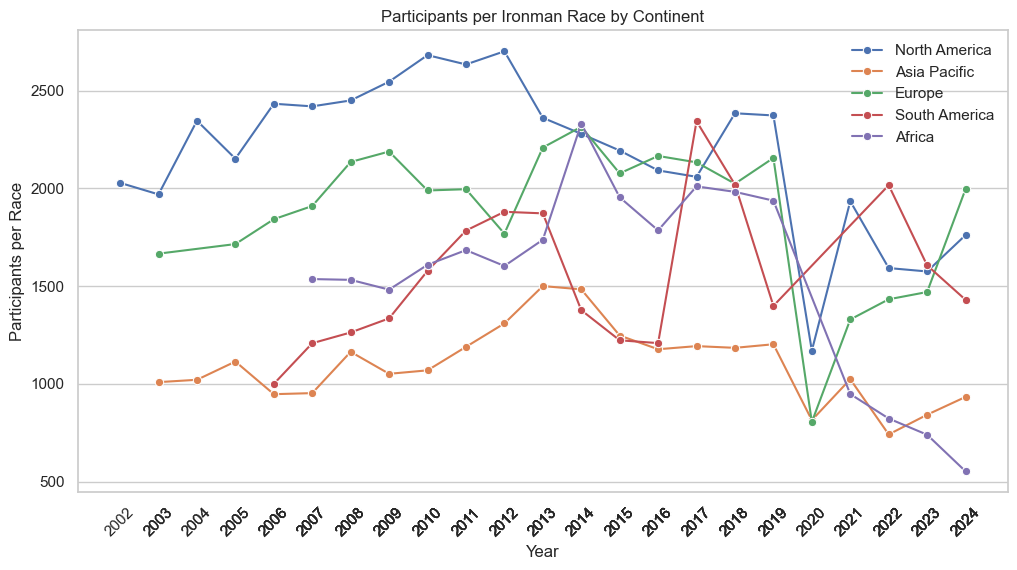

In [29]:
# Create a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='ratio',hue='continent', data=result_df, marker='o')

# Customize the plot
plt.title('Participants per Ironman Race by Continent')
plt.xlabel('Year')
plt.ylabel('Participants per Race')
plt.xticks(races_count_by_year_continent['year'],rotation=45)  # Ensure all years are shown on the x-axis
plt.grid(axis='x')


# Remove legend border 
plt.legend(frameon=False)

# Show the plot
plt.show()

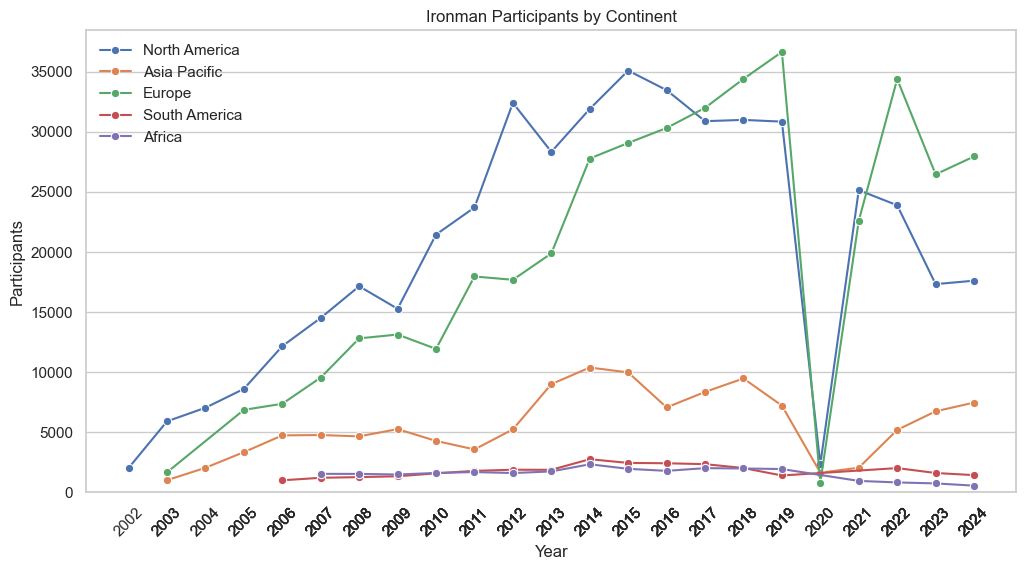

In [65]:
# Create a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_count',hue='continent', data=result_df, marker='o')

# Customize the plot
plt.title('Ironman Participants by Continent')
plt.xlabel('Year')
plt.ylabel('Participants')
plt.xticks(result_df['year'],rotation=45)  # Ensure all years are shown on the x-axis
plt.grid(axis='x')
plt.ylim(0)


# Remove legend border 
plt.legend(frameon=False)

# Show the plot
plt.show()

In [57]:
df_test = result_df[(result_df['year'].isin([2022,2023,2024])) & (result_df['continent'].isin(['Asia Pacific','North America', 'Europe']))].sort_values(by=['continent','year']).reset_index()

In [63]:
df_test.to_csv('test.csv')

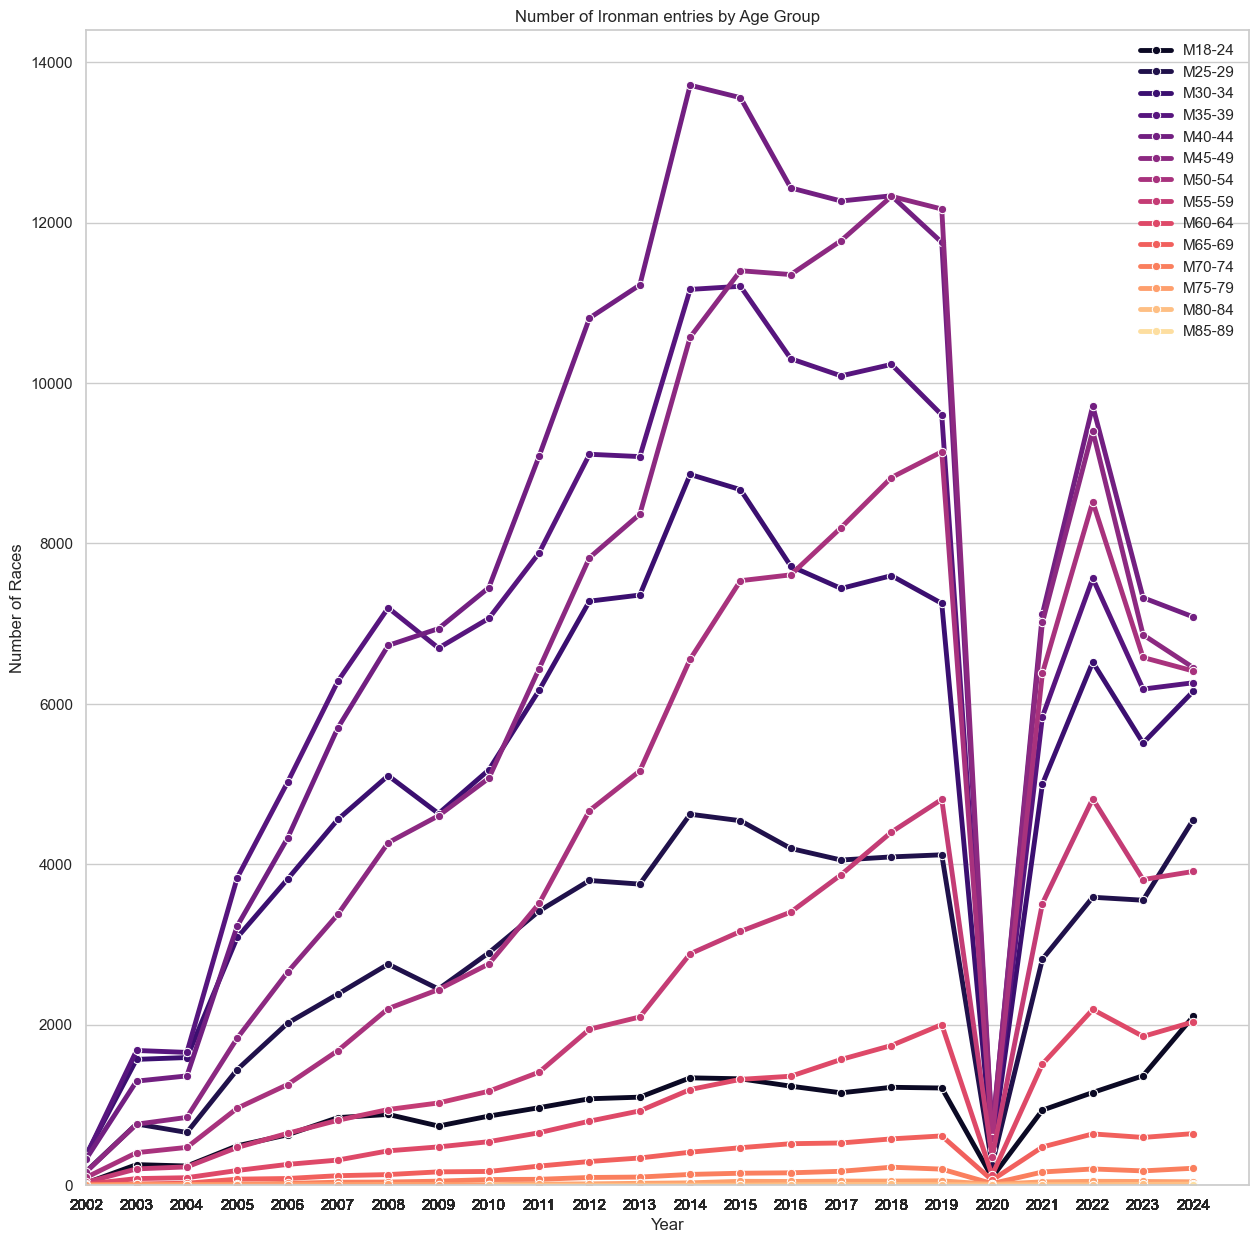

In [30]:
#let's take a look at participants over the year
division_year_df = df.groupby(['year', 'Division']).size().reset_index(name='count')

color = sns.color_palette("magma", len(division_year_df[division_year_df['Division'].str.contains('M')].Division.unique())) 
# Create a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))
sns.lineplot(x='year', y='count',hue='Division', data=division_year_df[division_year_df['Division'].str.contains('M')], marker='o', palette = color, linewidth=3.5)

# Customize the plot
plt.title('Number of Ironman entries by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.xticks(division_year_df['year'],rotation=0)  # Ensure all years are shown on the x-axis
plt.grid(axis='x')
plt.ylim(0)
plt.xlim(2002)

# Remove legend border 
plt.legend(frameon=False)

# Show the plot
plt.show()


In [70]:
division_year_df[(division_year_df['Division'].str.contains('M')) & (division_year_df['year'].isin([2023,2024]))].sort_values(by=['Division','year'])

,year,Division,count
514,2023,M18-24,1365
539,2024,M18-24,2107
515,2023,M25-29,3553
540,2024,M25-29,4559
516,2023,M30-34,5512
541,2024,M30-34,6159
517,2023,M35-39,6185
542,2024,M35-39,6264
518,2023,M40-44,7324
543,2024,M40-44,7084


In [32]:
division_year_df

,year,Division,count
0,2002,F18-24,10
1,2002,F25-29,74
2,2002,F30-34,126
3,2002,F35-39,96
4,2002,F40-44,70
...,...,...,...
548,2024,M65-69,644
549,2024,M70-74,212
550,2024,M75-79,43
551,2024,M80-84,15


### All Ironman Races

In [33]:
# Function to convert HH:MM:SS to decimal hours
def time_to_hours(time_str):
    if isinstance(time_str, str):
        h, m, s = map(int, time_str.split(':'))
        return h + m / 60 + s / 3600
    return None
df_m = df[df['Division'].str.contains('M')]
df_f = df[df['Division'].str.contains('F')]

# Apply the function to the 'overallTime' column and create a new column 'overallTimeHours'
df_m['overallTimeHours'] = df_m['overallTime'].apply(time_to_hours)
df_f['overallTimeHours'] = df_f['overallTime'].apply(time_to_hours)

C:\Users\migus\AppData\Local\Temp\ipykernel_46140\1769246043.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['overallTimeHours'] = df_m['overallTime'].apply(time_to_hours)
C:\Users\migus\AppData\Local\Temp\ipykernel_46140\1769246043.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['overallTimeHours'] = df_f['overallTime'].apply(time_to_hours)


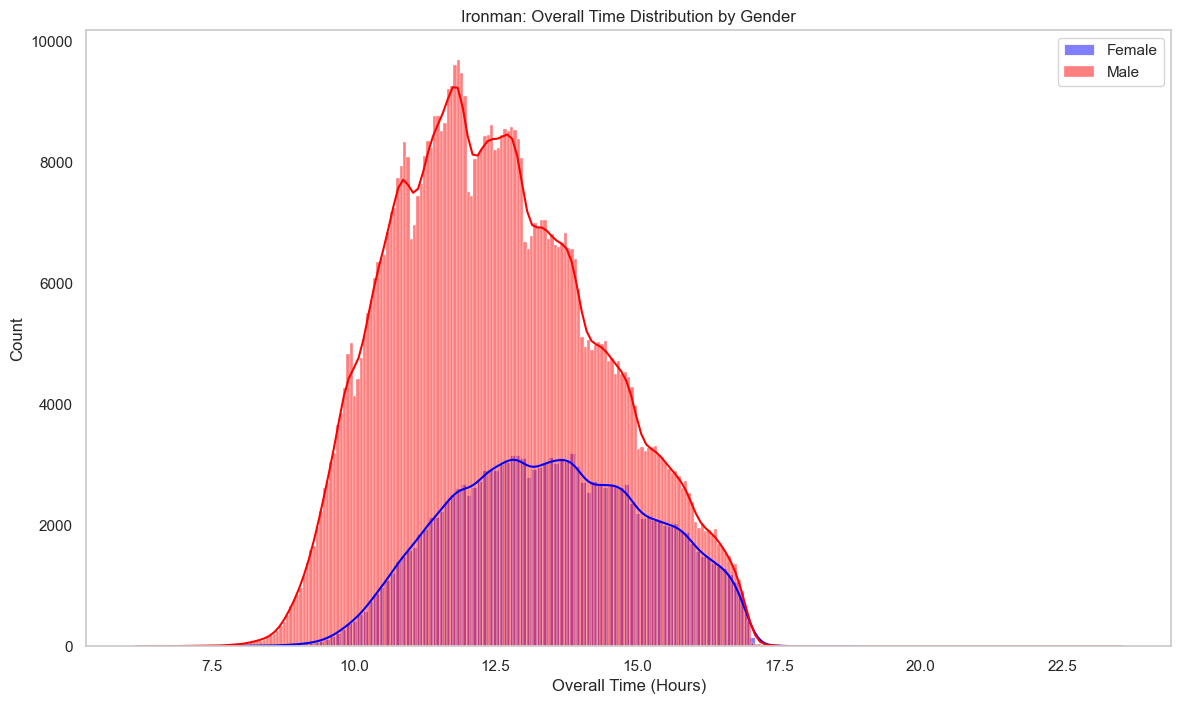

In [34]:
plt.figure(figsize=(14, 8))

sns.histplot(data=df_f, x='overallTimeHours', color='blue', label='Female', kde=True, alpha=0.5)
sns.histplot(data=df_m, x='overallTimeHours', color='red', label='Male', kde=True, alpha=0.5)

# Customize the plot
plt.title('Ironman: Overall Time Distribution by Gender')
plt.xlabel('Overall Time (Hours)')
plt.ylabel('Count')

# Remove gridlines
plt.grid(False)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [35]:
country_participants = df.groupby(['Country']).size().reset_index(name='count')
country_participants = country_participants.sort_values(by='count', ascending = False)
country_participants = country_participants[country_participants['Country'] != 'Unknown' ]

top_ten = country_participants.head(10)['Country'].tolist()

country_participants_by_year = df.groupby(['Country','year']).size().reset_index(name='count')
country_participants_by_year = country_participants_by_year[country_participants_by_year['Country'].isin(top_ten)]
country_participants_by_year

,Country,year,count
208,Australia,2003,258
209,Australia,2004,840
210,Australia,2005,625
211,Australia,2006,2246
212,Australia,2007,2224
...,...,...,...
3264,United States,2020,1665
3265,United States,2021,7983
3266,United States,2022,7017
3267,United States,2023,12255


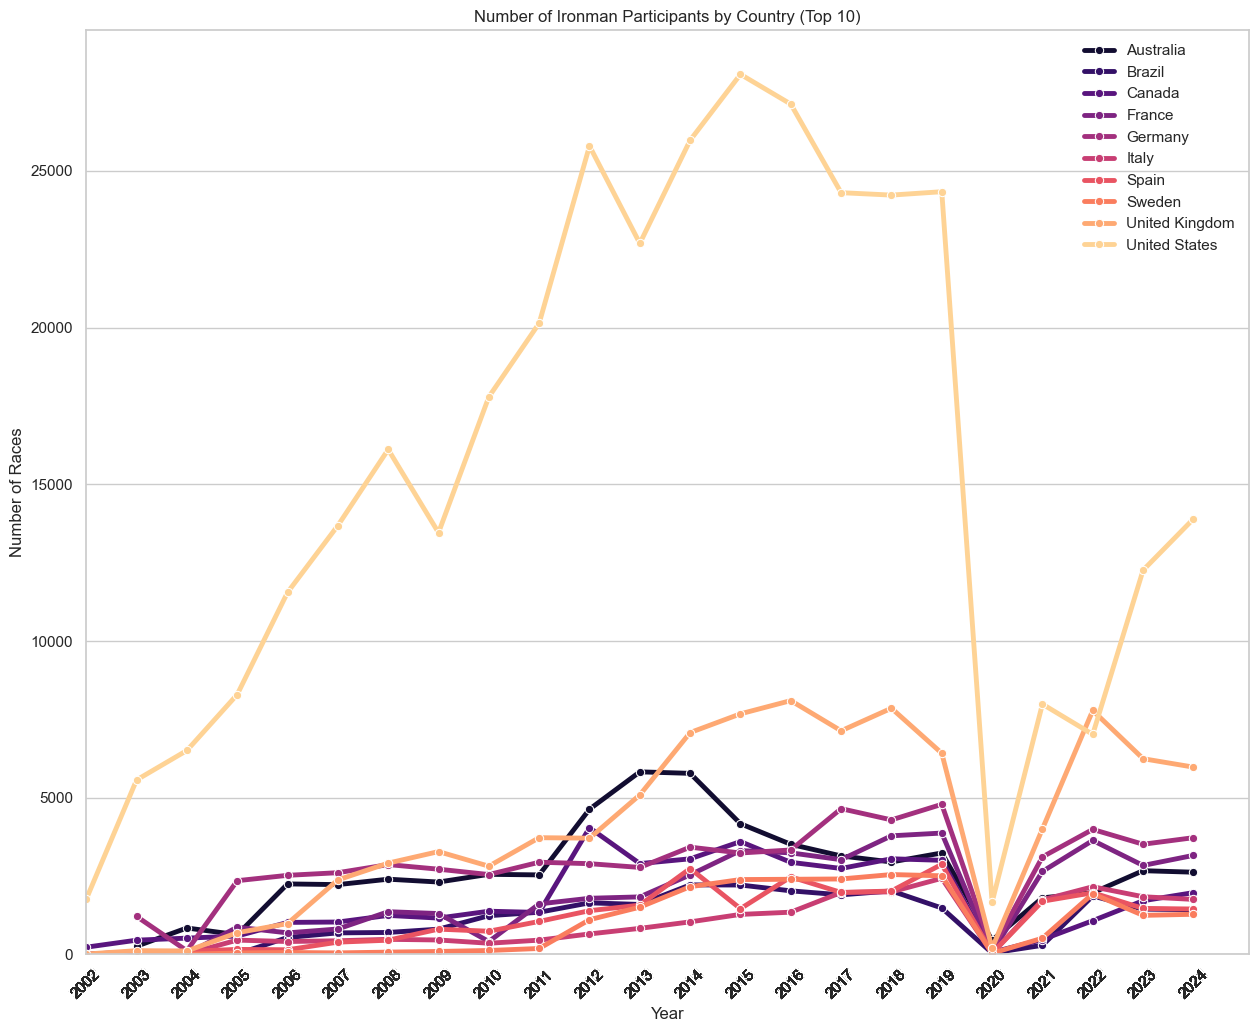

In [36]:
color = sns.color_palette("magma", len(top_ten)) 
# Create a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))
sns.lineplot(x='year', y='count',hue='Country', data=country_participants_by_year, marker='o', palette = color, linewidth=3.5)

# Customize the plot
plt.title('Number of Ironman Participants by Country (Top 10)')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.xticks(division_year_df['year'],rotation=45)  # Ensure all years are shown on the x-axis
plt.grid(axis='x')
plt.ylim(0)
plt.xlim(2002)

# Remove legend border 
plt.legend(frameon=False)

# Show the plot
plt.show()

### Ironman Wisconsin 2024

In [37]:
df_wisco = df[(df['location'] == 'Ironman Wisconsin')]


df_wisco_m = df_wisco[df_wisco['Division'].str.contains('M')]
df_wisco_f = df_wisco[df_wisco['Division'].str.contains('F')]

In [38]:
# Apply the function to the 'overallTime' column and create a new column 'overallTimeHours'
df_wisco_m['overallTimeHours'] = df_wisco_m['overallTime'].apply(time_to_hours)
df_wisco_f['overallTimeHours'] = df_wisco_f['overallTime'].apply(time_to_hours)



C:\Users\migus\AppData\Local\Temp\ipykernel_46140\4091145791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wisco_m['overallTimeHours'] = df_wisco_m['overallTime'].apply(time_to_hours)
C:\Users\migus\AppData\Local\Temp\ipykernel_46140\4091145791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wisco_f['overallTimeHours'] = df_wisco_f['overallTime'].apply(time_to_hours)


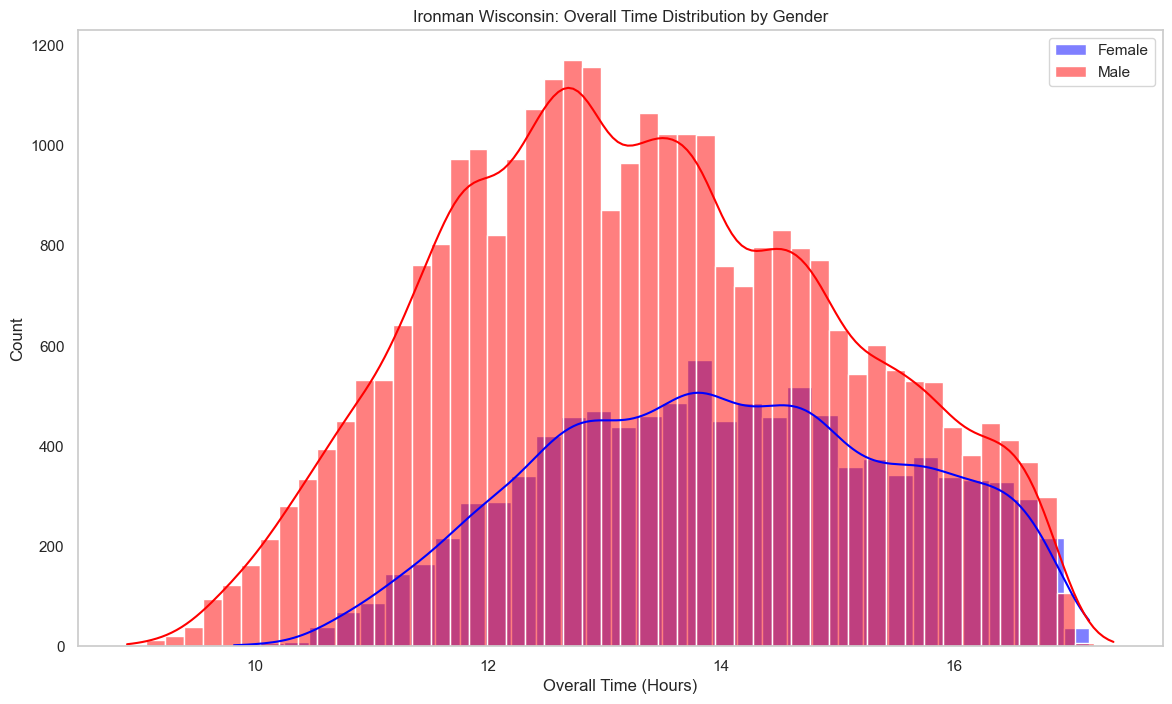

In [39]:
plt.figure(figsize=(14, 8))

sns.histplot(data=df_wisco_f, x='overallTimeHours', color='blue', label='Female', kde=True, alpha=0.5)
sns.histplot(data=df_wisco_m, x='overallTimeHours', color='red', label='Male', kde=True, alpha=0.5)

# Customize the plot
plt.title('Ironman Wisconsin: Overall Time Distribution by Gender')
plt.xlabel('Overall Time (Hours)')
plt.ylabel('Count')

# Remove gridlines
plt.grid(False)

# Add legend
plt.legend()

# Show the plot
plt.show()
